# Test for Creating a Network over an Area

In [1]:
from shapely.geometry import Point, LineString, Polygon

import matplotlib.pyplot as plt

import geopandas as gpd

import numpy as np

from rtree import index


C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\geopandas\_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Creating the square

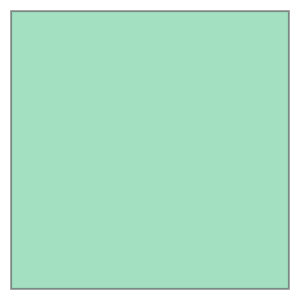

In [2]:
polygon = Polygon([(0,0),(0,1000),(1000,1000),(1000,0)])
polygon

Creating the points

In [3]:
count =  np.arange(0, 1025, 25, dtype=int)

In [8]:
points = []
for i in range(len(count)):
    point = count[i]
    for j in count:
        points.append(Point(point,j))
        points.append(Point(j,point))
nodes_gpd = gpd.GeoSeries(points)
network_nodes = gpd.GeoDataFrame(geometry=nodes_gpd)
network_nodes['fid'] = range(1,len(network_nodes)+1)
network_nodes

,geometry,fid
0,POINT (0.000 0.000),1
1,POINT (0.000 0.000),2
2,POINT (0.000 25.000),3
3,POINT (25.000 0.000),4
4,POINT (0.000 50.000),5
...,...,...
3357,POINT (950.000 1000.000),3358
3358,POINT (1000.000 975.000),3359
3359,POINT (975.000 1000.000),3360
3360,POINT (1000.000 1000.000),3361


Checking in the right positions

In [5]:
# xs = [point.x for point in points]
# ys = [point.y for point in points]
# plt.scatter(xs, ys)
# x,y = polygon.exterior.xy
# plt.fill(x,y)
# plt.plot(xs, ys,'ro')
# plt.show

In [10]:
for index,row in network_nodes.iterrows():
    row

geometry    POINT (0 0)
fid                   1
Name: 0, dtype: object
geometry    POINT (0 0)
fid                   2
Name: 1, dtype: object
geometry    POINT (0 25)
fid                    3
Name: 2, dtype: object
geometry    POINT (25 0)
fid                    4
Name: 3, dtype: object
geometry    POINT (0 50)
fid                    5
Name: 4, dtype: object
geometry    POINT (50 0)
fid                    6
Name: 5, dtype: object
geometry    POINT (0 75)
fid                    7
Name: 6, dtype: object
geometry    POINT (75 0)
fid                    8
Name: 7, dtype: object
geometry    POINT (0 100)
fid                     9
Name: 8, dtype: object
geometry    POINT (100 0)
fid                    10
Name: 9, dtype: object
geometry    POINT (0 125)
fid                    11
Name: 10, dtype: object
geometry    POINT (125 0)
fid                    12
Name: 11, dtype: object
geometry    POINT (0 150)
fid                    13
Name: 12, dtype: object
geometry    POINT (150 0)
fid             

1
0    1
1    2
Name: fid, dtype: int64
1
0    1
1    2
Name: fid, dtype: int64
1
2      3
83    84
Name: fid, dtype: int64
1
3      4
82    83
Name: fid, dtype: int64
1
3      4
82    83
Name: fid, dtype: int64
1
2      3
83    84
Name: fid, dtype: int64
1
84    85
85    86
Name: fid, dtype: int64
1
84    85
85    86
Name: fid, dtype: int64


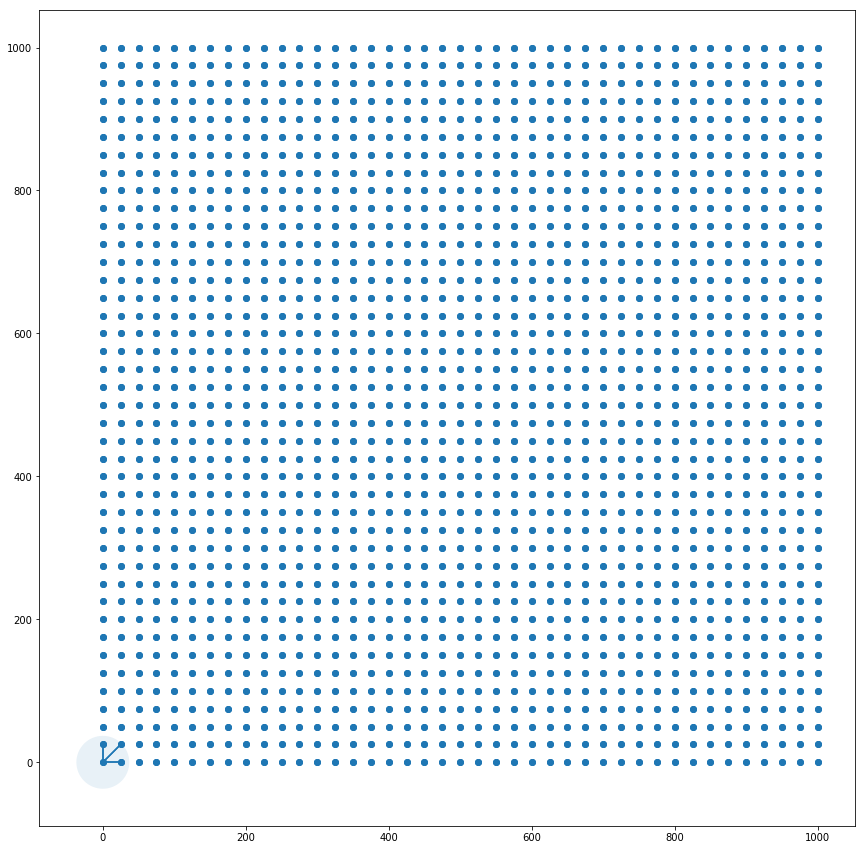

In [20]:
node_1 = network_nodes.iloc[0]
#node_1.fid
#node_1.geometry
#buffer = node_1.buffer(60) for grid
buffer = node_1.geometry.buffer(37)
buffer_gpd= gpd.GeoSeries(buffer)
# x,y = buffer.exterior.xy
# plt.fill(x,y)
# plt.plot(xs, ys,'ro')
# plt.show

links = []
start_node = []
end_node = []
intersection = network_nodes.intersection(buffer)
intersection = intersection[~intersection.is_empty]
for i in intersection:
    print(node_1.fid)
    start_node.append(node_1.fid)
    print(network_nodes.loc[network_nodes['geometry']== i,'fid'])
    end_point = network_nodes.loc[network_nodes['geometry']== i,'fid']
    end_node.append(end_point)
    links.append(LineString([node_1.geometry,i]))
links_gpd = gpd.GeoSeries(links)
#links_gpd.plot()

fig, ax = plt.subplots(figsize=(15,15))
links_gpd.plot(ax=ax,zorder=3)
nodes_gpd.plot(ax=ax,zorder = 2)
buffer_gpd.plot(ax=ax,zorder=1,alpha=0.1)

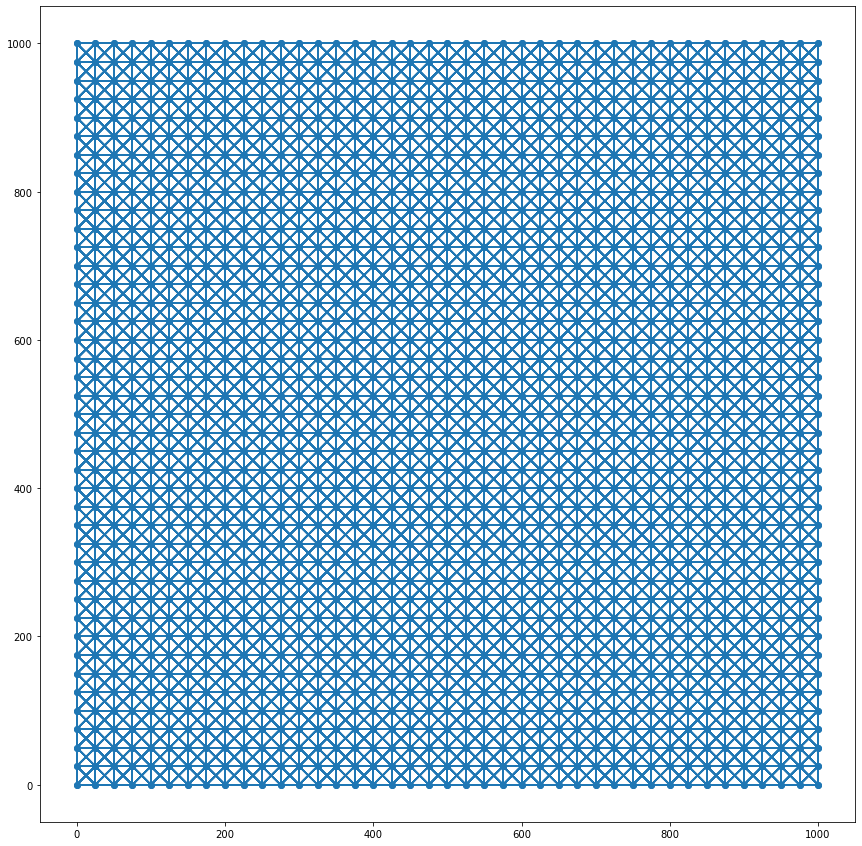

In [14]:
lines = []
for i in points:
    buffer = i.buffer(37)
    intersection = nodes_gpd.intersection(buffer)
    intersection = intersection[~intersection.is_empty]
    for j in intersection:
        lines.append(LineString([i,j]))
links_gpd = gpd.GeoSeries(lines)

fig, ax = plt.subplots(figsize=(15,15))
links_gpd.plot(ax=ax,zorder=3)
nodes_gpd.plot(ax=ax,zorder = 2)
plt.savefig("grid.png",transparent=True)

Add ID's to the Nodes and Links

In [21]:
network_nodes = gpd.GeoDataFrame(geometry=nodes_gpd)
network_nodes['fid'] = range(1,len(network_nodes)+1)
network_nodes

,geometry,fid
0,POINT (0.000 0.000),1
1,POINT (0.000 0.000),2
2,POINT (0.000 25.000),3
3,POINT (25.000 0.000),4
4,POINT (0.000 50.000),5
...,...,...
3357,POINT (950.000 1000.000),3358
3358,POINT (1000.000 975.000),3359
3359,POINT (975.000 1000.000),3360
3360,POINT (1000.000 1000.000),3361


In [22]:
network_links = gpd.GeoDataFrame(geometry=links_gpd)
network_links['fid'] = range(1,len(network_links)+1)
network_links

,geometry,fid
0,"LINESTRING (0.000 0.000, 0.000 0.000)",1
1,"LINESTRING (0.000 0.000, 0.000 0.000)",2
2,"LINESTRING (0.000 0.000, 25.000 0.000)",3
3,"LINESTRING (0.000 0.000, 25.000 0.000)",4
4,"LINESTRING (0.000 0.000, 0.000 0.000)",5
...,...,...
171375,"LINESTRING (1000.000 1000.000, 1000.000 975.000)",171376
171376,"LINESTRING (1000.000 1000.000, 1000.000 975.000)",171377
171377,"LINESTRING (1000.000 1000.000, 975.000 1000.000)",171378
171378,"LINESTRING (1000.000 1000.000, 1000.000 1000.000)",171379


In [26]:
def create_index(network_nodes):
    idx = index.Index()
    # set the bounds for the index
    for i in range(len(network_nodes['fid'])):
        left, bottom, right, top = (network_nodes['geometry'][i].x, network_nodes['geometry'][i].y,
                                    network_nodes['geometry'][i].x, network_nodes['geometry'][i].y)
        idx.insert(i, (left, bottom, right, top))
    return idx

In [27]:
idx = create_index(network_nodes)

In [31]:
startnodes = []
endnodes = []

for index, row  in network_links.iterrows():
    Linestring = (row['geometry']).bounds
    bounds = []
    for bound in Linestring:
        bounds.append(bound)
    start_point = (bounds[0],bounds[1])
    end_point = (bounds[2],bounds[3])
    for i in idx.nearest(start_point, 1):
        first_node = network_nodes['fid'][i]
        #print(first_node)
        startnodes.append(first_node)
        #print('End of first node')
    for i in idx.nearest(end_point, 1):
        last_node = network_nodes['fid'][i]
        #print(last_node)
        endnodes.append(last_node)
        #print('End of last node')
    #print('end of row')

network_links['startNodes']= startnodes
network_links['endNodes'] = endnodes
network_links

ValueError: Length of values (342760) does not match length of index (171380)

In [ ]:
def get_nearest_nodes(idx, network_nodes,link):
    Linestring = (link['geometry']).bounds
    bounds = []
    for bound in Linestring:
        bounds.append(bound)
    start_point = (bounds[0],bounds[1])
    end_point = (bounds[2],bounds[3])
    for i in idx.nearest(start_point, 1):
        first_node = network_nodes['fid'][i]
        #print(first_node)
        startnodes.append(first_node)
        #print('End of first node')
    for i in idx.nearest(end_point, 1):
        last_node = network_nodes['fid'][i]
        #print(last_node)
        endnodes.append(last_node)

In [ ]:
startnodes = []
endnodes = []

for index, row in network_links.iterrows():
    get_nearest_nodes(idx,network_nodes,row)
network_links['startNodes']= startnodes
network_links['endNodes'] = endnodes
network_links

Creating the Network
